# Beijing PM2.5

How to use `analysta` with [Beijing PM2.5](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data) data. Go ahead and download the data (put them in the same dir as this notebook).

In the original data, the available attributes are as follows:
* No: row number 
* year: year of data in this row 
* month: month of data in this row 
* day: day of data in this row 
* hour: hour of data in this row 
* pm2.5: PM2.5 concentration (ug/m^3) 
* DEWP: Dew Point (°C) 
* TEMP: Temperature (°C) 
* PRES: Pressure (hPa) 
* cbwd: Combined wind direction - five broad categories:
    * northwest (NW), which includes W, WNW, NW, NNW and N;
    * northeast (NE), which includes NNE, NE and ENE;
    * southeast (SE), which includes E, ESE, SE, SSE and S;
    * southwest (SW), which includes SSW, SW and WSW;
    * calm and variable (CV)
* Iws: Cumulated wind speed (m/s) 
* Is: Cumulated hours of snow 
* Ir: Cumulated hours of rain

We're interested in predicting pm2.5 values. The row number contains no real information, and year, month, day and hour fields could be combinet into single datetime. The combined wind direction field is textual, and we cannot directly use it. Let's write a custom data loader that will fix it for us.

In [1]:
# %load series_loader.py
import csv
import datetime
import numpy


def to_float(val):
    try:
        return float(val)
    except ValueError:
        return float("NaN")


def series_loader(file_path, mmap_mode='r'):
    """
    Load Beijing PM2.5 data and convert it into usable format
    :param file_path: data series *.csv file path
    :param mmap_mode: ignored, for compatibility only
    :return:
    """

    with open(file_path) as csvfile:
        reader = csv.DictReader(csvfile)

        converted = []

        for row in reader:
            date = datetime.datetime(
                int(row['year']), int(row['month']),
                int(row['day']), int(row['hour'])
            )

            row['cbwd'] = row['cbwd'].upper()
            NW = (row['cbwd'] == 'NW')
            NE = (row['cbwd'] == 'NE')
            SE = (row['cbwd'] == 'SE')
            SW = (row['cbwd'] == 'SW')
            CV = (row['cbwd'] == 'CV')

            converted.append([
                date,
                to_float(row['pm2.5']),
                float(row['DEWP']),
                float(row['TEMP']),
                float(row['PRES']),
                NW,
                NE,
                SE,
                SW,
                CV,
                float(row['Iws']),
                float(row['Is']),
                float(row['Ir'])
            ])

    return numpy.array(converted)


Now we have a numpy array we can use, which has the follwing columns:
["Datetime", "PM2.5", "DEWP", "TEMP", "PRES", "NW", "NE", "SE", "SW", "CV", "Iws", "Is", "Ir"]. Time to run some analysis. We will use the following `data_config.json`:

In [2]:
# %load data_config.json
{
  "data": {
    "input_channels": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "channels_names": ["Datetime", "PM2.5", "DEWP", "TEMP", "PRES", "NW", "NE", "SE", "SW", "CV", "Iws", "Is", "Ir"],
    "train_paths": [
	  "PRSA_data_2010.1.1-2014.12.31.csv"
    ],
    "series_loader": "./series_loader.py",
    "missing_threshold_low": 1,
    "missing_threshold_high": -1
  }
}


{'data': {'channels_names': ['Datetime',
   'PM2.5',
   'DEWP',
   'TEMP',
   'PRES',
   'NW',
   'NE',
   'SE',
   'SW',
   'CV',
   'Iws',
   'Is',
   'Ir'],
  'input_channels': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'missing_threshold_high': -1,
  'missing_threshold_low': 1,
  'series_loader': './series_loader.py',
  'train_paths': ['PRSA_data_2010.1.1-2014.12.31.csv']}}

In [1]:
from analysta.cli.data import run_missing

run_missing('data_config.json', results_dir='')

Using TensorFlow backend.
/Users/yuijim/.virtualenvs/analysta/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


100%|██████████| 1/1 [00:00<00:00,  1.86it/s, series=PRSA_data_2010.1.1-2014.12.31]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'PRSA_data_2010.1.1-2014.12.31': {1: [(0, 24, 24),
   (545, 67, 612),
   (1877, 2, 1879),
   (2118, 7, 2125),
   (2126, 17, 2143),
   (2145, 8, 2153),
   (2171, 2, 2173),
   (3281, 2, 3283),
   (3523, 5, 3528),
   (3646, 19, 3665),
   (3708, 72, 3780),
   (3796, 37, 3833),
   (4088, 2, 4090),
   (4138, 24, 4162),
   (5396, 68, 5464),
   (6078, 16, 6094),
   (6283, 5, 6288),
   (6317, 155, 6472),
   (6473, 76, 6549),
   (6830, 2, 6832),
   (7305, 54, 7359),
   (7811, 2, 7813),
   (8760, 24, 8784),
   (8944, 48, 8992),
   (10316, 7, 10323),
   (10581, 91, 10672),
   (10892, 4, 10896),
   (10897, 8, 10905),
   (10907, 4, 10911),
   (10915, 2, 10917),
   (10987, 4, 10991),
   (11050, 52, 11102),
   (11105, 7, 11112),
   (11113, 10, 11123),
   (11247, 9, 11256),
   (11257, 12, 11269),
   (11273, 7, 11280),
   (11281, 14, 11295),
   (11412, 9, 11421),
   (11422, 2, 11424),
   (11425, 10, 11435),
   (11441, 7, 11448),
   (11449, 14, 11463),
   (11582, 10, 11592),
   (11593, 7, 11600),
   (12

Missing data stats are in `PRSA_data_2010.1.1-2014.12.31_missing_stats.csv`:

In [ ]:
# %load PRSA_data_2010.1.1-2014.12.31_missing_stats.csv
1,"(0, 24, 24)","(545, 67, 612)","(1877, 2, 1879)","(2118, 7, 2125)","(2126, 17, 2143)","(2145, 8, 2153)","(2171, 2, 2173)","(3281, 2, 3283)","(3523, 5, 3528)","(3646, 19, 3665)","(3708, 72, 3780)","(3796, 37, 3833)","(4088, 2, 4090)","(4138, 24, 4162)","(5396, 68, 5464)","(6078, 16, 6094)","(6283, 5, 6288)","(6317, 155, 6472)","(6473, 76, 6549)","(6830, 2, 6832)","(7305, 54, 7359)","(7811, 2, 7813)","(8760, 24, 8784)","(8944, 48, 8992)","(10316, 7, 10323)","(10581, 91, 10672)","(10892, 4, 10896)","(10897, 8, 10905)","(10907, 4, 10911)","(10915, 2, 10917)","(10987, 4, 10991)","(11050, 52, 11102)","(11105, 7, 11112)","(11113, 10, 11123)","(11247, 9, 11256)","(11257, 12, 11269)","(11273, 7, 11280)","(11281, 14, 11295)","(11412, 9, 11421)","(11422, 2, 11424)","(11425, 10, 11435)","(11441, 7, 11448)","(11449, 14, 11463)","(11582, 10, 11592)","(11593, 7, 11600)","(12251, 29, 12280)","(12464, 5, 12469)","(12512, 3, 12515)","(13845, 63, 13908)","(13970, 22, 13992)","(13993, 29, 14022)","(14063, 22, 14085)","(14102, 2, 14104)","(14350, 2, 14352)","(14374, 2, 14376)","(14377, 23, 14400)","(14401, 9, 14410)","(15373, 99, 15472)","(15906, 6, 15912)","(15929, 19, 15948)","(16067, 2, 16069)","(16427, 2, 16429)","(17842, 74, 17916)","(18946, 6, 18952)","(20876, 40, 20916)","(20935, 8, 20943)","(20987, 2, 20989)","(21522, 6, 21528)","(22172, 2, 22174)","(22553, 44, 22597)","(22889, 42, 22931)","(23007, 2, 23009)","(23051, 74, 23125)","(24010, 3, 24013)","(25292, 20, 25312)","(25456, 2, 25458)","(26094, 127, 26221)","(29584, 16, 29600)","(30395, 2, 30397)","(31163, 6, 31169)","(31910, 2, 31912)","(32101, 4, 32105)","(32433, 2, 32435)","(33038, 4, 33042)","(33375, 2, 33377)","(34793, 2, 34795)","(35010, 17, 35027)","(35329, 5, 35334)","(35584, 2, 35586)","(37552, 2, 37554)","(38411, 2, 38413)","(38882, 9, 38891)","(39112, 2, 39114)","(39685, 5, 39690)","(39923, 2, 39925)","(40576, 2, 40578)","(40624, 9, 40633)","(42837, 12, 42849)","(43190, 2, 43192)","(43266, 5, 43271)","(43273, 11, 43284)","(43544, 9, 43553)"
2,complete
3,complete
4,complete
5,complete
6,complete
7,complete
8,complete
9,complete
10,complete
11,complete
12,complete


As can be seen, the channel with index 1 (which in this case is PM2.5) has missing values. Each gap is described in the (start, length, stop) format. Most of the gaps are short, but several are very long. Let's assume we can interpolate all gaps shorter than 12 hours, but longer gaps will effectively split our series. 

In [2]:
import csv
import ast
import os

SPLIT_THRESHOLD = 11

with open('PRSA_data_2010.1.1-2014.12.31_missing_stats.csv', newline='') as f:
    reader = csv.reader(f)
    first_row = next(reader)[1:]
    gaps = [ast.literal_eval(v) for v in first_row]

print('total gaps: {}'.format(len(gaps)))

split_at = [v for g in gaps if g[1] > SPLIT_THRESHOLD for v in (g[0],g[2])]

print('long gaps: {}'.format(int(len(split_at)/2)))

if split_at[0] == 0:
    split_at = split_at[1:]
else:
    split_at = [0] + split_at
    
if not os.path.exists('raw'):
    os.mkdir('raw')

with open('PRSA_data_2010.1.1-2014.12.31.csv', newline='') as f:
    reader = csv.DictReader(f)
    writer = None
    wf = None
    
    series = 0
    start = split_at[0]
    end = split_at[1]
    for i, row in enumerate(reader):
        if i == end:
            wf.close()
            writer = None
            series += 1
            start = split_at[series*2]
            end = split_at[series*2 + 1] if series*2 + 1 < len(split_at) else None
        elif i == start:
            wf = open(os.path.join('raw','series_{}.csv'.format(series)), 'w')
            writer = csv.DictWriter(wf, fieldnames=reader.fieldnames)
            writer.writeheader()
        if writer:
            writer.writerow(row)
    if end is None:
        wf.close()
        series += 1
    
paths = os.listdir('raw')
paths.sort()
print(paths)

total gaps: 102
long gaps: 37
['series_0.csv', 'series_1.csv', 'series_10.csv', 'series_11.csv', 'series_12.csv', 'series_13.csv', 'series_14.csv', 'series_15.csv', 'series_16.csv', 'series_17.csv', 'series_18.csv', 'series_19.csv', 'series_2.csv', 'series_20.csv', 'series_21.csv', 'series_22.csv', 'series_23.csv', 'series_24.csv', 'series_25.csv', 'series_26.csv', 'series_27.csv', 'series_28.csv', 'series_29.csv', 'series_3.csv', 'series_30.csv', 'series_31.csv', 'series_32.csv', 'series_33.csv', 'series_34.csv', 'series_35.csv', 'series_36.csv', 'series_4.csv', 'series_5.csv', 'series_6.csv', 'series_7.csv', 'series_8.csv', 'series_9.csv']


For filling-in missing values we will use `run_cleaning` from `analysta` with `cleaning_config.json`:

In [ ]:
# %load cleaning_config.json
{
  "data": {
    "input_channels": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "channels_names": ["Datetime", "PM2.5", "DEWP", "TEMP", "PRES", "NW", "NE", "SE", "SW", "CV", "Iws", "Is", "Ir"],
    "train_paths": [
	  "series_0.csv", "series_1.csv", "series_2.csv", "series_3.csv", "series_4.csv",
      "series_5.csv", "series_6.csv", "series_7.csv", "series_8.csv", "series_9.csv",
      "series_10.csv", "series_11.csv", "series_12.csv", "series_13.csv", "series_14.csv",
      "series_15.csv", "series_16.csv", "series_17.csv", "series_18.csv", "series_19.csv",
      "series_20.csv", "series_21.csv", "series_22.csv", "series_23.csv", "series_24.csv",
      "series_25.csv", "series_26.csv", "series_27.csv", "series_28.csv", "series_29.csv",
      "series_30.csv", "series_31.csv", "series_32.csv", "series_33.csv", "series_34.csv",
      "series_35.csv", "series_36.csv"
    ],
    "train_paths_prefix": "raw",
    "series_loader": "./series_loader.py"
  }
}


In [3]:
from analysta.cli.data import run_cleaning

run_cleaning('cleaning_config.json', results_dir='cleaned')

100%|██████████| 37/37 [00:03<00:00, 11.55it/s, series=series_36]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


Now, we wold like to know some basic things about our data and get some basic training/validation/testing split. For that, we will use the follwing configuration:

In [ ]:
# %load stats_config.json
{
  "data": {
    "input_channels": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "channels_names": ["Datetime", "PM2.5", "DEWP", "TEMP", "PRES", "NW", "NE", "SE", "SW", "CV", "Iws", "Is", "Ir"],
    "train_paths": [
	  "series_0.npy", "series_1.npy", "series_2.npy", "series_3.npy", "series_4.npy",
      "series_5.npy", "series_6.npy", "series_7.npy", "series_8.npy", "series_9.npy",
      "series_10.npy", "series_11.npy", "series_12.npy", "series_13.npy", "series_14.npy",
      "series_15.npy", "series_16.npy", "series_17.npy", "series_18.npy", "series_19.npy",
      "series_20.npy", "series_21.npy", "series_22.npy", "series_23.npy", "series_24.npy",
      "series_25.npy", "series_26.npy", "series_27.npy", "series_28.npy", "series_29.npy",
      "series_30.npy", "series_31.npy", "series_32.npy", "series_33.npy", "series_34.npy",
      "series_35.npy", "series_36.npy"
    ],
    "train_paths_prefix": "cleaned",
    "mmap_mode": null
  }
}


In [10]:
import json

from analysta.cli.data import run_stats

dataset_split = run_stats('stats_config.json', anomalies=False, propose_split=True)

print(json.dumps(dataset_split, indent=4))

100%|██████████| 37/37 [00:00<00:00, 743.97it/s, series=series_36]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
{'train': {'anomalous samples': None,
           'anomalous samples per series': None,
           'no of series': 37,
           'no of series with anomalies': None,
           'series lengths': {1: 2,
                              12: 1,
                              16: 1,
                              41: 1,
                              43: 1,
                              62: 1,
                              120: 1,
                              154: 1,
                              155: 1,
                              160: 1,
                              223: 1,
                              292: 2,
                              305: 1,
                              378: 1,
                              457: 1,
                              521: 1,
                              614: 1,
                              756: 1,
                              782: 1,
              

Now, we can finally run some regression. Let's start with simple ExponentialSmoothing model:

In [ ]:
# %load es_config.json
{
  "setup": {
    "model": "analysta.models.x2x.smoothing.ExponentialSmoothingModel"
  },

  "data": {
    "input_channels": [1],
    "output_channels": [1],
    "channels_names": ["Datetime", "PM2.5", "DEWP", "TEMP", "PRES", "NW", "NE", "SE", "SW", "CV", "Iws", "Is", "Ir"],
    "train_paths": [
        "series_5.npy",
        "series_20.npy",
        "series_35.npy",
        "series_18.npy",
        "series_25.npy",
        "series_23.npy",
        "series_4.npy",
        "series_33.npy",
        "series_9.npy",
        "series_27.npy",
        "series_24.npy",
        "series_0.npy",
        "series_19.npy",
        "series_26.npy",
        "series_30.npy"
    ],
    "val_paths": [
        "series_31.npy",
        "series_32.npy",
        "series_36.npy",
        "series_1.npy",
        "series_8.npy",
        "series_21.npy",
        "series_12.npy",
        "series_16.npy",
        "series_28.npy"
    ],
    "test_paths": [
        "series_13.npy",
        "series_7.npy",
        "series_15.npy",
        "series_2.npy",
        "series_3.npy",
        "series_22.npy",
        "series_11.npy",
        "series_17.npy",
        "series_10.npy",
        "series_29.npy",
        "series_6.npy",
        "series_14.npy",
        "series_34.npy"
    ],
    "train_paths_prefix": "cleaned",
    "val_paths_prefix": "cleaned",
    "test_paths_prefix": "cleaned",
    "mmap_mode": null
  },

  "preparation": {
    "look_back": 16,
    "batch_size": 1024
  },

  "analyzer": {
    "disabled": true
  }
}


In [8]:
import pprint
import os

from analysta.cli.model import run_single

if not os.path.exists('results'):
    os.mkdir('results')

config, _, _ = run_single('es_config.json', results_dir='results')

pprint.pprint(config['out.model'])

 43%|████▎     | 6/14 [00:00<00:00, 25.62it/s]

/Users/yuijim/Projects/cern_lhc/analysta/analysta/metrics/from_partials.py:207: RuntimeWarning: invalid value encountered in log
  numpy.log(real_y + 1) - numpy.log(predicted_y + 1),


100%|██████████| 14/14 [00:00<00:00, 27.60it/s]

Saving ExponentialSmoothingModel is not supported.



{'parameters': None,
 'test': {'mae': 0.13591843258838131128,
          'mape': 104.84343150490356,
          'mse': 0.055818887847703387162,
          'msle': nan,
          'r2': 0.9368968975152460671,
          'rmse': 0.23626021215537623224,
          'rmsle': nan},
 'train': {'nb_epoch': 1},
 'val': {'mse': 0.04573516851094667}}


Well, the good news is that validation and testing MSE roughly matches. The bad news is the default ES settings simply do not work.

Let's optimize them.

First, we need a config for optimizer:

In [ ]:
# %load es_optimize.json
{
  "function": "skopt.gp_minimize",
  "function_kwargs": {},
  "metric": "out.model.val.mse",
  "optimize": {
    "model.alpha": {
      "min": 0,
      "max": 1,
      "array_like": "data.input_channels"
    },
    "preparation.look_back": {
      "min": 16,
      "max": 256,
      "type": "integer"
    }
  }
}

And now the optimization itself (this is going to take awhile):

In [ ]:
from analysta.cli.model import run_optimize


best_config = run_optimize('es_config.json', 'es_optimize.json', results_dir='results')

Notice how the amount of batches changes - depending on the `look_back` value the available data changes.

In [ ]:
print('model.alpha', best_config['model.alpha'])
print('preparation.look_back', best_config['preparation.look_back'])

out_config, _, _ = run_single(best_config, results_dir='results')

pprint.pprint(out_config['out.model'])

It seems that this isn't working very well. LSTM to the rescue -- and maybe with some more input channels?

In [ ]:
# %load lstm_config.json
{
  "setup": {
    "model": "analysta.models.x2y.RNNModel"
  },

  "data": {
    "input_channels": [[1, 13]],
    "output_channels": [1],
    "channels_names": ["Datetime", "PM2.5", "DEWP", "TEMP", "PRES", "NW", "NE", "SE", "SW", "CV", "Iws", "Is", "Ir"],
    "train_paths": [
        "series_5.npy",
        "series_20.npy",
        "series_35.npy",
        "series_18.npy",
        "series_25.npy",
        "series_23.npy",
        "series_4.npy",
        "series_33.npy",
        "series_9.npy",
        "series_27.npy",
        "series_24.npy",
        "series_0.npy",
        "series_19.npy",
        "series_26.npy",
        "series_30.npy"
    ],
    "val_paths": [
        "series_31.npy",
        "series_32.npy",
        "series_36.npy",
        "series_1.npy",
        "series_8.npy",
        "series_21.npy",
        "series_12.npy",
        "series_16.npy",
        "series_28.npy"
    ],
    "test_paths": [
        "series_13.npy",
        "series_7.npy",
        "series_15.npy",
        "series_2.npy",
        "series_3.npy",
        "series_22.npy",
        "series_11.npy",
        "series_17.npy",
        "series_10.npy",
        "series_29.npy",
        "series_6.npy",
        "series_14.npy",
        "series_34.npy"
    ],
    "train_paths_prefix": "cleaned",
    "val_paths_prefix": "cleaned",
    "test_paths_prefix": "cleaned",
    "mmap_mode": null
  },

  "preparation": {
    "look_back": 72,
    "batch_size": 1024
  },

  "model": {
    "max_nb_epochs": 30,
    "cells": [32],
    "rnn_class": "keras.layers.LSTM"
  },

  "analyzer": {
    "disabled": true
  }
}


In [3]:
import pprint
import os

from analysta.cli.model import run_single

if not os.path.exists('results'):
    os.mkdir('results')

out_config, _, _ = run_single('lstm_config.json', results_dir='results')

pprint.pprint(out_config['out.model'])

/Users/yuijim/Projects/cern_lhc/analysta/analysta/data/sequences/data_sequence.py:130: RuntimeWarning: invalid value encountered in true_divide
  studentized_x = np.nan_to_num((batch_x - self.__dataset_mean) / dataset_std)


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]

/Users/yuijim/Projects/cern_lhc/analysta/analysta/metrics/from_partials.py:207: RuntimeWarning: invalid value encountered in log
  numpy.log(real_y + 1) - numpy.log(predicted_y + 1),


100%|██████████| 13/13 [00:04<00:00,  3.96it/s]
{'parameters': 1873,
 'test': {'mae': 0.13218141202860758755,
          'mape': 69.7812759706792,
          'mse': 0.047927500021781051652,
          'msle': nan,
          'r2': 0.94654942163840156185,
          'rmse': 0.21892350267109525591,
          'rmsle': nan},
 'train': {'loss': 0.05752373046750735,
           'mean_squared_error': 0.05752373046750735,
           'nb_epoch': 50},
 'val': {'loss': 0.06685794551147275,
         'mean_squared_error': 0.06685794551147275}}


## And here's ready-to-use model with some visualization

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/yuijim/Projects/cern_lhc/analysta/analysta/data/sequences/data_sequence.py:130: RuntimeWarning: invalid value encountered in true_divide
  studentized_x = np.nan_to_num((batch_x - self.__dataset_mean) / dataset_std)
/Users/yuijim/Projects/cern_lhc/analysta/analysta/metrics/from_partials.py:207: RuntimeWarning: invalid value encountered in log
  numpy.log(real_y + 1) - numpy.log(predicted_y + 1),


<IPython.core.display.Javascript object>


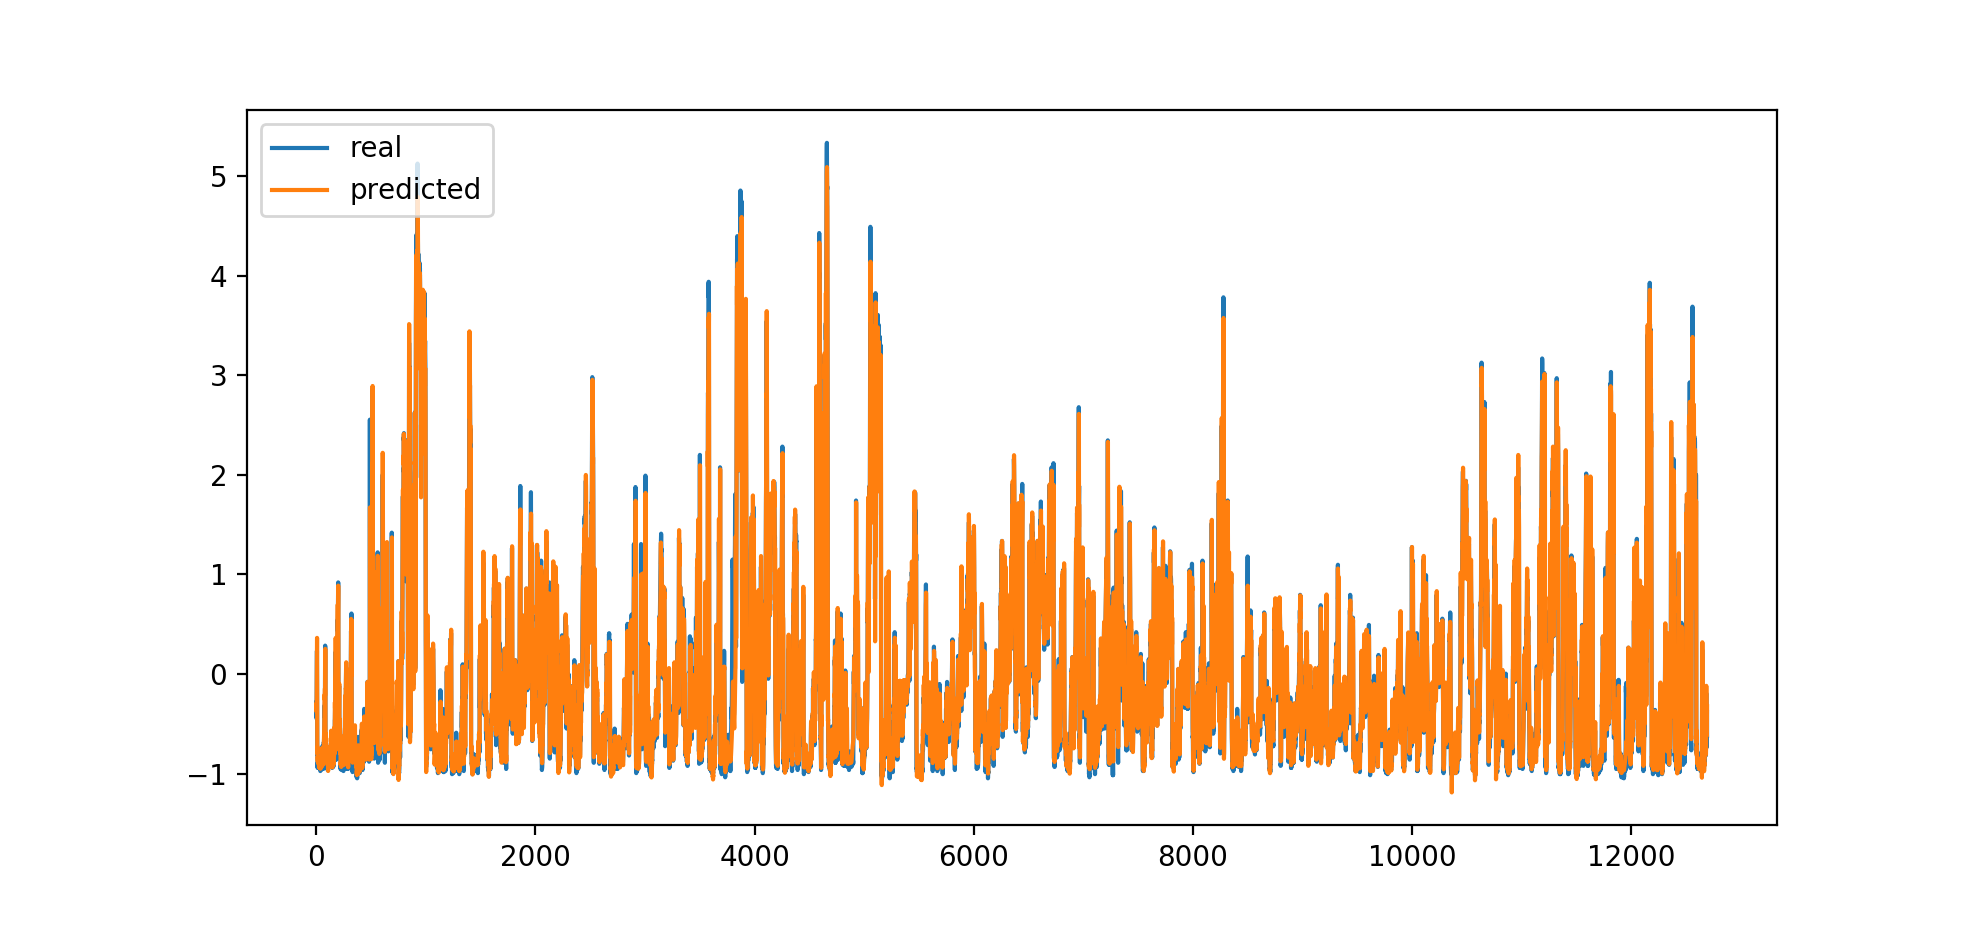

100%|██████████| 1/1 [00:01<00:00,  1.69s/it]
{'parameters': 1873,
 'test': {'mae': 0.13483252204880686032,
          'mape': 70.73583621262227,
          'mse': 0.050129295110352594364,
          'msle': nan,
          'r2': 0.94409365818083204174,
          'rmse': 0.22389572374289017305,
          'rmsle': nan}}


In [8]:
%matplotlib notebook

import pprint
import os

from analysta.cli.model import run_single

if not os.path.exists('results'):
    os.mkdir('results')

out_config, _, _ = run_single('lstm_config_best.json', results_dir='results')

pprint.pprint(out_config['out.model'])